In [52]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
from sklearn import linear_model
from numpy import arange
from sklearn.linear_model import LassoCV
from itertools import cycle
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

In [53]:
from sklearn.linear_model import enet_path

In [54]:
dataframe = read_csv('frst26.csv', header = None,nrows= 100)
print(dataframe.shape)
dataframe.head()

(100, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,37.550697,54.162910,78.000646,78.315777,99.518017,51.340211,96.020152,1.469290,35.932348,34.065767,...,0,0,0,0,0,0,0,0,0,0.527727
1,36.715044,36.865510,22.948168,40.278610,19.516831,56.398177,66.841060,14.881940,55.227367,86.604332,...,0,0,0,0,0,0,0,0,0,1.231863
2,27.731757,25.197732,7.256232,44.758872,87.213735,85.460310,94.855006,54.048071,3.064264,73.026991,...,0,0,0,0,0,0,0,0,0,0.025010
3,74.328620,31.351556,5.640941,56.879810,70.385267,20.778855,71.294869,44.557759,14.972031,77.350946,...,0,0,0,0,0,0,0,0,0,0.109302
4,64.893160,19.446318,28.512706,6.727051,64.921419,96.057769,51.084607,11.904422,25.806985,79.019423,...,0,0,0,0,0,0,0,0,0,0.273861


In [55]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

In [56]:
eps = 5e-3

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000

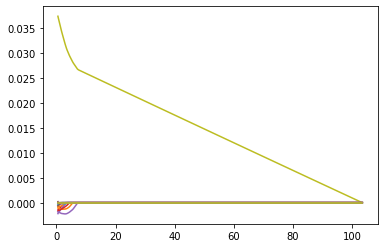

In [66]:
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)
m,n = X.shape
#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.set_xlim(0,100)
#ax.set_ylim(-0.003, 0.0025)
for i in range(n):
    plt.plot(alphas_enet, coefs_enet[i])
    print(coefs_enet[i])


In [58]:
df = read_csv('frst26.csv',header = None)
data2 = dataframe.values
X_2, y_2 = data2[:, :-1], data2[:, -1]
model = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)

In [59]:
model.fit(X, y)

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01482694172715604, tolerance: 0.009934209961161889
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7787756828776953, tolerance: 0.010678125608853282
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-p

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.436188999886724, tolerance: 0.010591297168837983
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4799316774598026, tolerance: 0.010187143512216909
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4693580788515277, tolerance: 0.010112211288619067
  model = cd_fast.enet_coordinate_descent_gr

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.383440004950401, tolerance: 0.010218134978666698
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5797383871466764, tolerance: 0.010636096411710655
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pac

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.708316384713143, tolerance: 0.010534530188761604
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6315750245444036, tolerance: 0.010812588929704374
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pac

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.708316384713143, tolerance: 0.010534530188761604
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.631575024544432, tolerance: 0.010812588929704374
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pack

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2596356857130644, tolerance: 0.010653411996281946
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3090608380644255, tolerance: 0.009260868360823963
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pa

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6767739291317554, tolerance: 0.011110579578171803
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.436188999886653, tolerance: 0.010591297168837983
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2596356857130786, tolerance: 0.010653411996281946
  model = cd_fast.enet_coordinate_descent_gr

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2959433689013906, tolerance: 0.010667322521189376
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.469358078851485, tolerance: 0.010112211288619067
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pac

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5797383871466764, tolerance: 0.010636096411710655
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: C

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.209435132686778, tolerance: 0.009934209961161889
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Co

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.209435132686693, tolerance: 0.009934209961161889
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3165954563054356, tolerance: 0.01028290626259582
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pack

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7679543082253844, tolerance: 0.010678125608853282
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWar

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.162403034687017, tolerance: 0.009653876586240184
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Co

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2596356857130218, tolerance: 0.010653411996281946
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4593744942865357, tolerance: 0.010931597037399626
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pa

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.676773929131741, tolerance: 0.011110579578171803
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarn

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.43618899988671, tolerance: 0.010591297168837983
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.479931677459817, tolerance: 0.010187143512216909
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packa

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3874398207755974, tolerance: 0.010157177319214098
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3834400049504723, tolerance: 0.010218134978666698
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pa

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.442036363768281, tolerance: 0.010435276309725027
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Co

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2959433689014332, tolerance: 0.010667322521189376
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWar

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1331513122203773, tolerance: 0.010204431155017879
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: C

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4593744942864646, tolerance: 0.010931597037399626
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWar

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3165954563053788, tolerance: 0.01028290626259582
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.767954308225441, tolerance: 0.010678125608853282
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pack

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.545668516223074, tolerance: 0.01070118101477635
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coo

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.295943368901419, tolerance: 0.010667322521189376
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarn

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3165954563054214, tolerance: 0.01028290626259582
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarn

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4693580788514993, tolerance: 0.010112211288619067
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWar

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5456685162231025, tolerance: 0.01070118101477635
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7679543082254696, tolerance: 0.010678125608853282
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pac

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.43618899988671, tolerance: 0.010591297168837983
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coo

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6315750245444605, tolerance: 0.010812588929704374
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.31659545630545, tolerance: 0.01028290626259582
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packa

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5456685162231025, tolerance: 0.01070118101477635
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.229420447970014, tolerance: 0.010163325000242847
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-pack

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is d

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.698317028086379, tolerance: 0.010563255670900934
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Co

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.416940060097687, tolerance: 0.01068904498454708
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarni

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4799316774597884, tolerance: 0.010187143512216909
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWar

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.38743982077564, tolerance: 0.010157177319214098
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coo

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6315750245444036, tolerance: 0.010812588929704374
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWar

ElasticNetCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0],
             cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             l1_ratio=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
             n_jobs=-1)

In [60]:
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print(mean(scores))

0.09415639206890153


In [61]:
yhat = model.predict(X_2)

In [62]:
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 1.000000
l1_ratio_: 0.990000


In [63]:
from sklearn.metrics import mean_squared_error as mse_error
mse = mse_error(yhat,y_2)
print(mse)

0.07972684880876858
